In [160]:
import pandas as pd 
df=pd.read_csv("/kaggle/input/mock-test-2-mse-2/train.csv")
print(df.head())

   id  N_Days             Drug      Age Sex Ascites Hepatomegaly Spiders  \
0   0  1481.0          Placebo  12963.0   F       N            Y       N   
1   1  2580.0  D-penicillamine  20819.0   F       N            N       N   
2   2   837.0  D-penicillamine  12307.0   F       N            Y       Y   
3   3  3021.0              NaN  17532.0   F     NaN          NaN     NaN   
4   4  1980.0              NaN  23011.0   F     NaN          NaN     NaN   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        2.4        346.0     3.34    70.0    1212.0  122.45   
1     N        0.6          NaN     4.52    51.0     645.0   74.40   
2     N        6.1        586.0     2.73    89.0    2045.0  196.85   
3     N        0.6          NaN     3.34     NaN       NaN     NaN   
4     N        0.8          NaN     3.65     NaN       NaN     NaN   

   Tryglicerides  Platelets  Prothrombin  Stage Status  
0          118.0      117.0         12.2    4.0      C  
1       

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [161]:
df.isnull().sum()

id                  0
N_Days              0
Drug             6541
Age                 0
Sex                 0
Ascites          6540
Hepatomegaly     6543
Spiders          6552
Edema               0
Bilirubin           0
Cholesterol      8375
Albumin             0
Copper           6657
Alk_Phos         6547
SGOT             6551
Tryglicerides    8422
Platelets         582
Prothrombin        19
Stage               0
Status              0
dtype: int64

In [162]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [163]:
df=pd.get_dummies(df,columns=['Sex'])

In [164]:
print(df.head())

   id  N_Days             Drug      Age Ascites Hepatomegaly Spiders Edema  \
0   0  1481.0          Placebo  12963.0       N            Y       N     N   
1   1  2580.0  D-penicillamine  20819.0       N            N       N     N   
2   2   837.0  D-penicillamine  12307.0       N            Y       Y     N   
3   3  3021.0  D-penicillamine  17532.0       N            N       N     N   
4   4  1980.0  D-penicillamine  23011.0       N            N       N     N   

   Bilirubin  Cholesterol  ...     Copper     Alk_Phos        SGOT  \
0        2.4   346.000000  ...  70.000000  1212.000000  122.450000   
1        0.6   327.408755  ...  51.000000   645.000000   74.400000   
2        6.1   586.000000  ...  89.000000  2045.000000  196.850000   
3        0.6   327.408755  ...  74.437732  1671.871596  106.072495   
4        0.8   327.408755  ...  74.437732  1671.871596  106.072495   

   Tryglicerides  Platelets  Prothrombin  Stage  Status Sex_F  Sex_M  
0     118.000000      117.0         12.

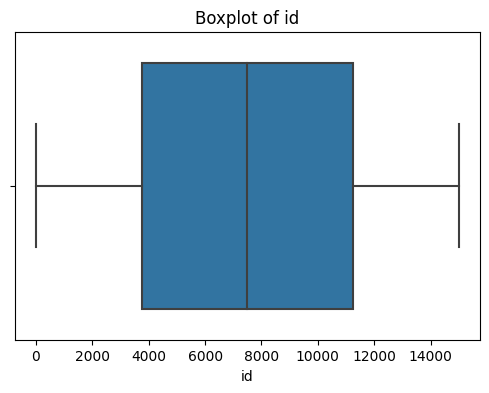

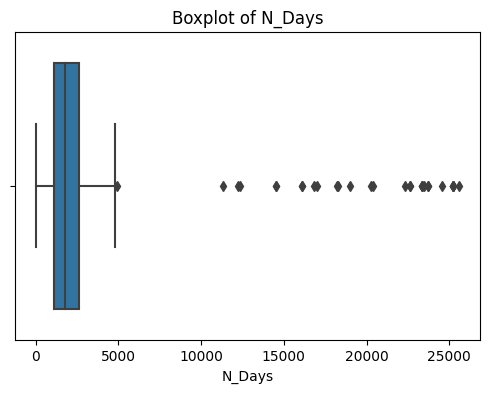

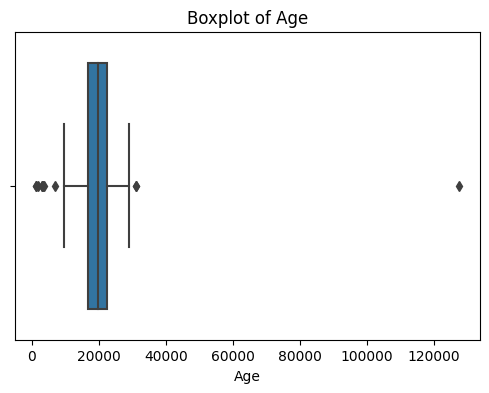

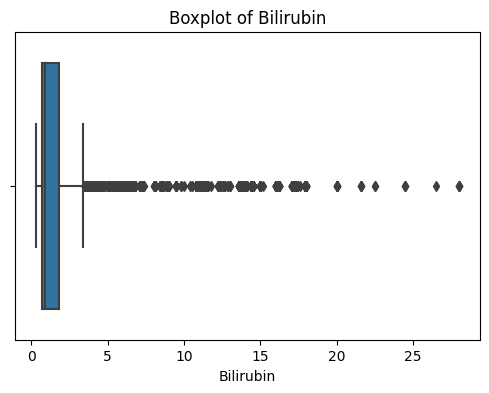

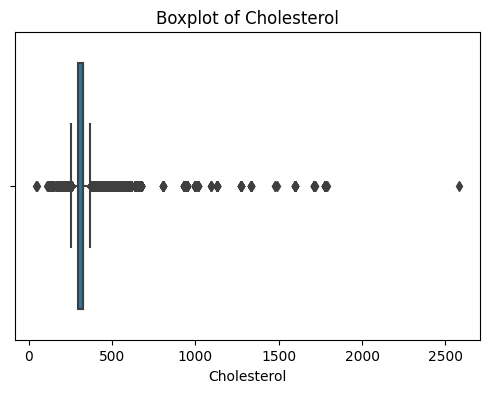

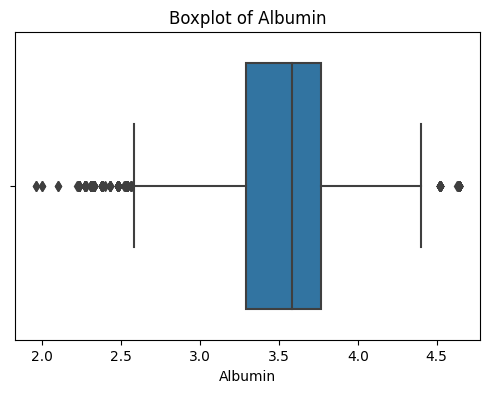

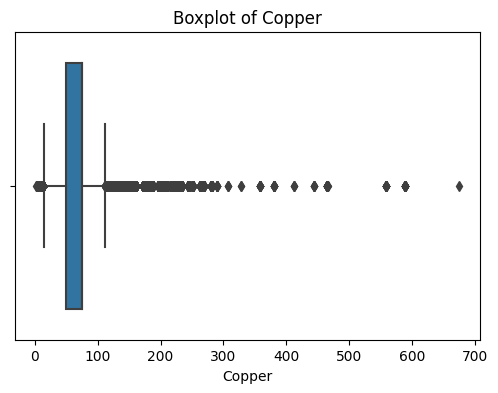

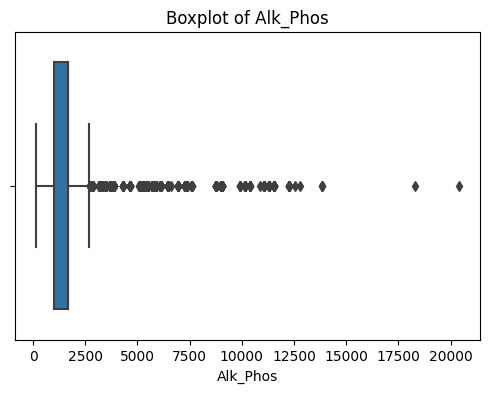

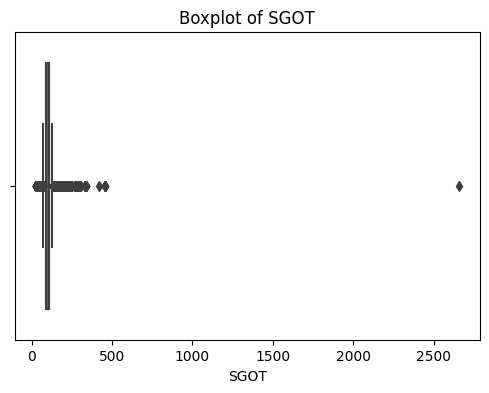

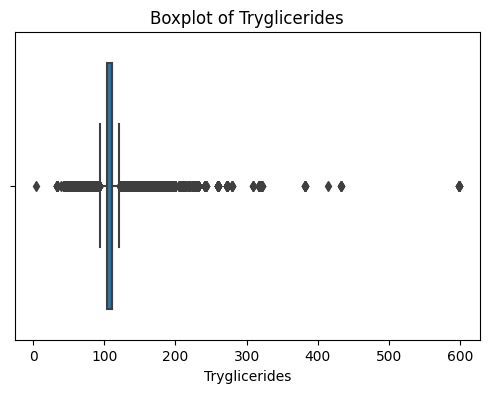

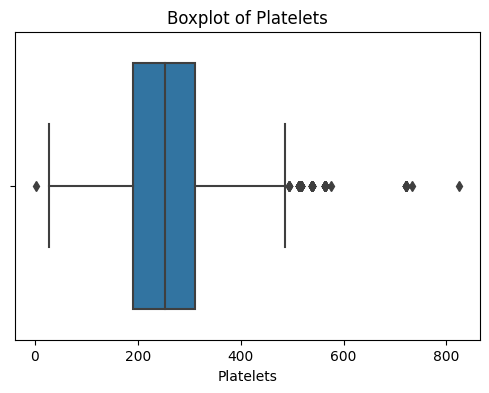

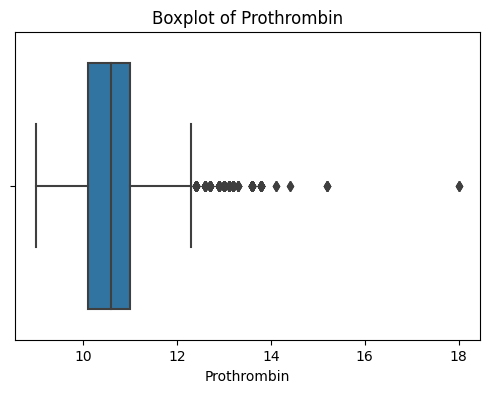

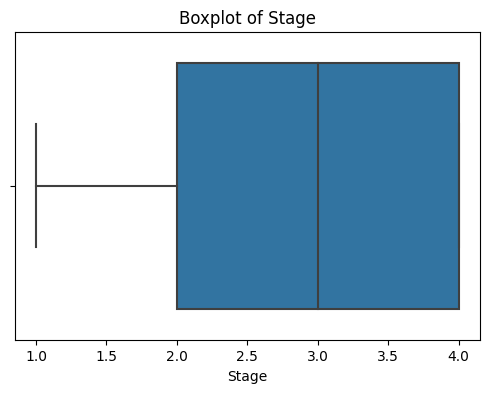

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [166]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df[col] = df[col].clip(lower, upper)


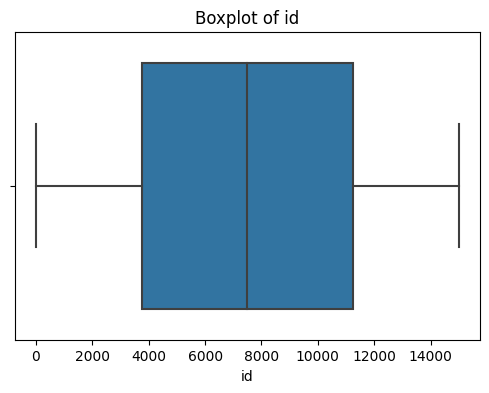

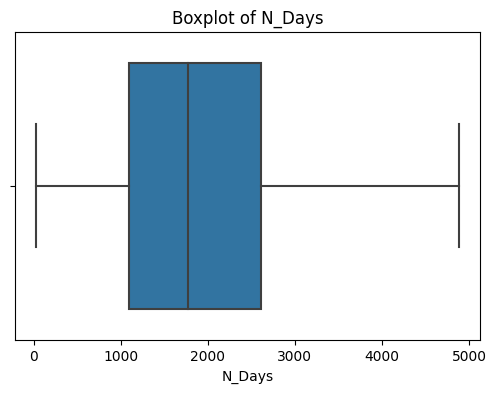

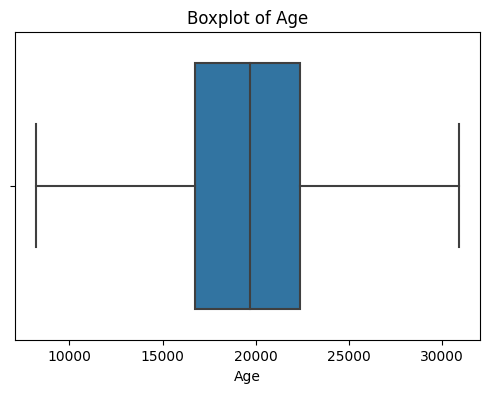

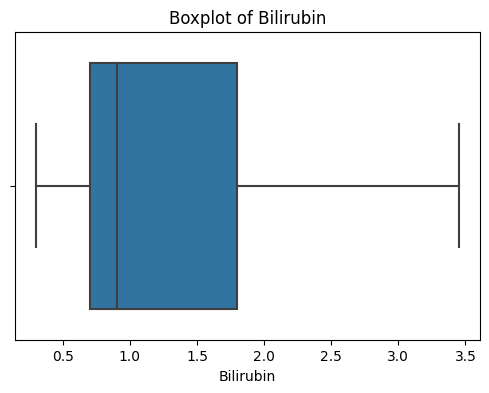

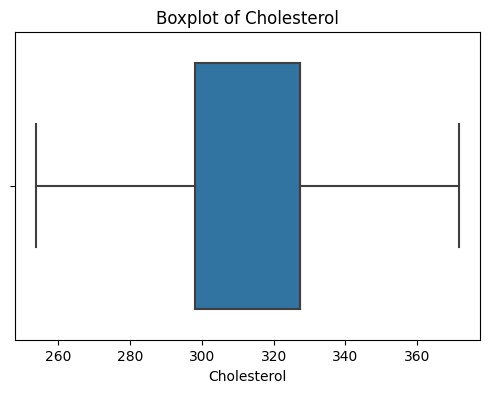

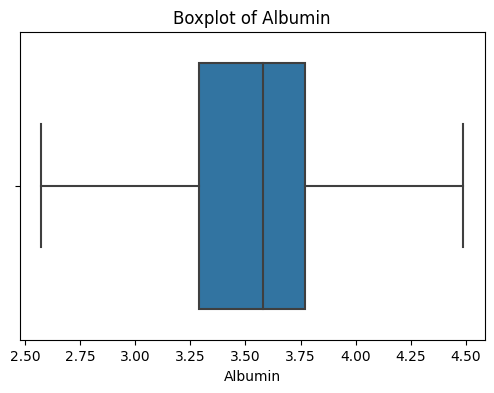

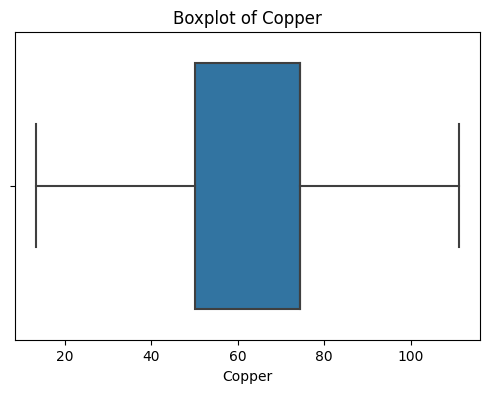

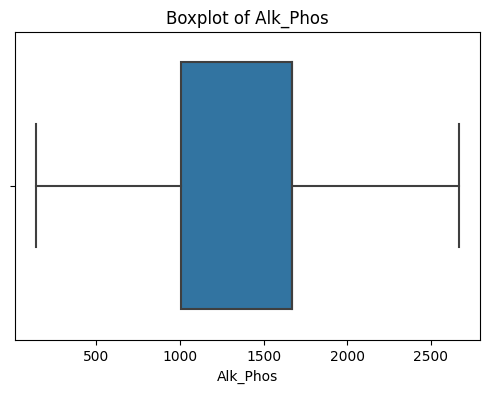

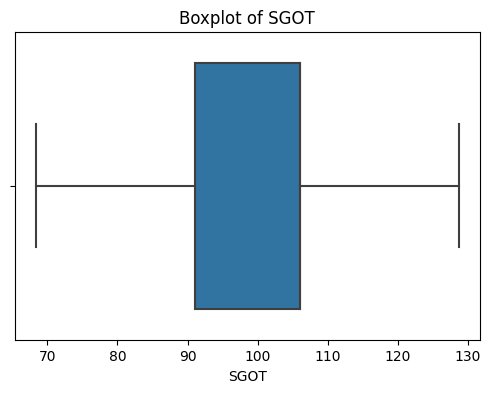

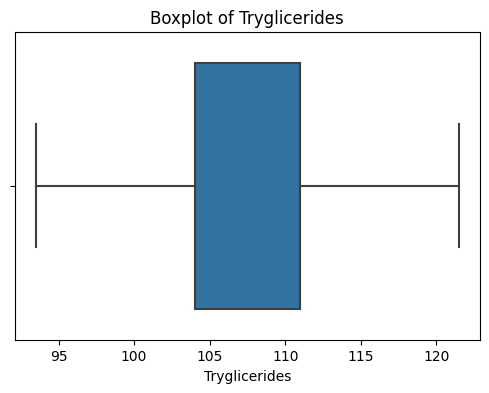

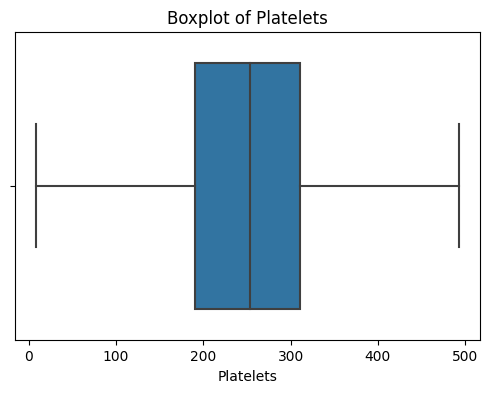

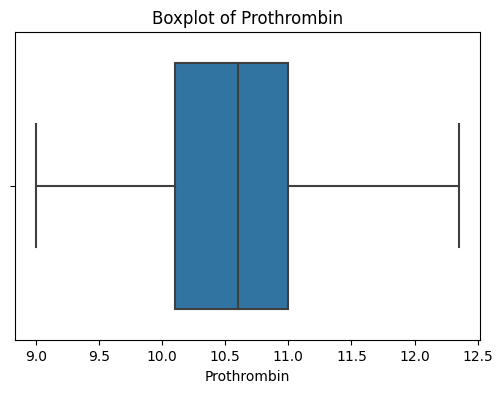

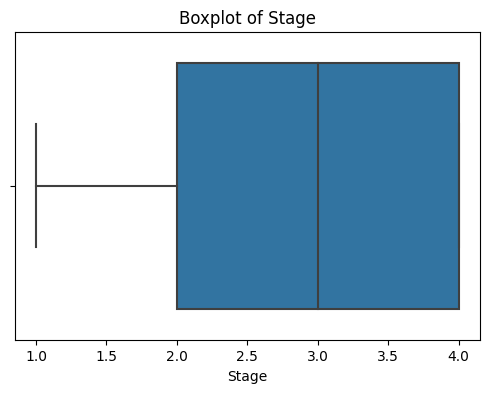

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [168]:
df.head()

,id,N_Days,Drug,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Sex_F,Sex_M
0,0,1481.0,Placebo,12963.0,N,Y,N,N,2.40,346.000000,...,70.000000,1212.000000,122.450000,118.000000,117.0,12.2,4.0,C,True,False
1,1,2580.0,D-penicillamine,20819.0,N,N,N,N,0.60,327.408755,...,51.000000,645.000000,74.400000,110.992703,181.0,10.4,3.0,C,True,False
2,2,837.0,D-penicillamine,12307.0,N,Y,Y,N,3.45,371.521887,...,89.000000,2045.000000,128.681237,93.510946,228.0,10.4,3.0,D,True,False
3,3,3021.0,D-penicillamine,17532.0,N,N,N,N,0.60,327.408755,...,74.437732,1671.871596,106.072495,110.992703,388.0,10.4,3.0,C,True,False
4,4,1980.0,D-penicillamine,23011.0,N,N,N,N,0.80,327.408755,...,74.437732,1671.871596,106.072495,110.992703,190.0,11.1,4.0,C,True,False


In [169]:
categorical_cols = df.select_dtypes(include=['object','category']).columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})


In [170]:
df.head()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Hepatomegaly_Y,Spiders_N,Spiders_Y,Spiders_id,Edema_N,Edema_S,Edema_Y,Status_C,Status_CL,Status_D
0,0,1481.0,12963.0,2.40,346.000000,3.34,70.000000,1212.000000,122.450000,118.000000,...,1,1,0,0,1,0,0,1,0,0
1,1,2580.0,20819.0,0.60,327.408755,4.49,51.000000,645.000000,74.400000,110.992703,...,0,1,0,0,1,0,0,1,0,0
2,2,837.0,12307.0,3.45,371.521887,2.73,89.000000,2045.000000,128.681237,93.510946,...,1,0,1,0,1,0,0,0,0,1
3,3,3021.0,17532.0,0.60,327.408755,3.34,74.437732,1671.871596,106.072495,110.992703,...,0,1,0,0,1,0,0,1,0,0
4,4,1980.0,23011.0,0.80,327.408755,3.65,74.437732,1671.871596,106.072495,110.992703,...,0,1,0,0,1,0,0,1,0,0


In [171]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns


In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [173]:
df.head()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Hepatomegaly_Y,Spiders_N,Spiders_Y,Spiders_id,Edema_N,Edema_S,Edema_Y,Status_C,Status_CL,Status_D
0,-1.731935,-0.417748,-1.762387,1.049107,0.867296,-0.515838,0.155415,-0.448849,1.067608,1.104977,...,1.674578,0.364009,-0.363892,-0.008165,0.293144,-0.242176,-0.155918,0.695049,-0.15925,-0.656213
1,-1.731704,0.609405,0.409738,-0.785650,0.337615,2.682781,-0.585755,-1.507896,-1.408019,0.301538,...,-0.597166,0.364009,-0.363892,-0.008165,0.293144,-0.242176,-0.155918,0.695049,-0.15925,-0.656213
2,-1.731473,-1.019646,-1.943766,2.119382,1.594437,-2.212497,0.896584,1.107035,1.388653,-1.702876,...,1.674578,-2.747182,2.748069,-0.008165,0.293144,-0.242176,-0.155918,-1.438748,-0.15925,1.523896
3,-1.731243,1.021574,-0.499093,-0.785650,0.337615,-0.515838,0.328526,0.410103,0.223808,0.301538,...,-0.597166,0.364009,-0.363892,-0.008165,0.293144,-0.242176,-0.155918,0.695049,-0.15925,-0.656213
4,-1.731012,0.048630,1.015809,-0.581788,0.337615,0.346398,0.328526,0.410103,0.223808,0.301538,...,-0.597166,0.364009,-0.363892,-0.008165,0.293144,-0.242176,-0.155918,0.695049,-0.15925,-0.656213


In [174]:
X = df.drop(['Status_C', 'Status_CL', 'Status_D'], axis=1)

y = df[['Status_C', 'Status_CL', 'Status_D']].idxmax(axis=1)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% test data
    random_state=42,  # ensures reproducibility
    stratify=y        
)



In [175]:
X_train

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Spiders_id,Edema_N,Edema_S,Edema_Y
9370,0.431973,0.256117,1.116729,-0.072133,0.337615,-0.098627,0.328526,0.410103,0.223808,0.301538,...,0.165096,-0.165096,0.597166,-0.597166,0.364009,-0.363892,-0.008165,0.293144,-0.242176,-0.155918
4980,-0.581854,0.227143,0.106978,-0.072133,0.337615,0.652353,0.328526,0.410103,0.223808,0.301538,...,0.165096,-0.165096,0.597166,-0.597166,0.364009,-0.363892,-0.008165,0.293144,-0.242176,-0.155918
12995,1.269131,-0.273816,1.042352,0.233660,0.337615,-0.654909,0.328526,0.410103,0.223808,0.301538,...,0.165096,-0.165096,0.597166,-0.597166,0.364009,-0.363892,-0.008165,0.293144,-0.242176,-0.155918
1909,-1.291071,-0.524295,1.015809,0.539452,0.337615,0.123886,0.328526,0.410103,0.223808,0.301538,...,0.165096,-0.165096,0.597166,-0.597166,0.364009,-0.363892,-0.008165,-3.411290,4.129230,-0.155918
8949,0.334748,0.443976,0.914889,-0.581788,0.337615,-0.348954,0.328526,0.410103,0.223808,0.301538,...,0.165096,-0.165096,0.597166,-0.597166,0.364009,-0.363892,-0.008165,0.293144,-0.242176,-0.155918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8313,0.187870,0.586039,1.723077,-0.785650,0.337615,0.346398,-0.312692,-1.446259,-1.567737,0.301538,...,0.165096,-0.165096,0.597166,-0.597166,0.364009,-0.363892,-0.008165,0.293144,-0.242176,-0.155918
9231,0.399873,0.227143,0.409738,-0.479857,0.337615,-0.543652,-2.029085,-0.682325,-1.717601,0.301538,...,0.165096,-0.165096,-1.674578,1.674578,0.364009,-0.363892,-0.008165,0.293144,-0.242176,-0.155918
8024,0.121128,-0.688789,0.308818,1.456831,0.337615,-0.543652,0.328526,0.410103,0.223808,0.301538,...,0.165096,-0.165096,0.597166,-0.597166,0.364009,-0.363892,-0.008165,-3.411290,-0.242176,6.413644
9831,0.538437,-0.708416,1.460962,0.743314,0.337615,0.012629,-1.560978,0.625141,1.388653,0.301538,...,0.165096,-0.165096,-1.674578,1.674578,0.364009,-0.363892,-0.008165,0.293144,-0.242176,-0.155918


In [176]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.847
